In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [8]:
df=pd.read_csv("data/car_details.csv")

#### Lets find more information on our dataframe

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    float64
 10  MPG_City     428 non-null    float64
 11  MPG_Highway  428 non-null    float64
 12  Weight       428 non-null    float64
 13  Wheelbase    428 non-null    float64
 14  Length       428 non-null    float64
dtypes: float64(8), object(7)
memory usage: 38.9+ KB


In [10]:
# Returns count of rows, columns in a tuple format
df.shape

(432, 15)

## Data Cleaning

In [11]:
# To find number of rows with null values in columns
df.isnull().sum()

Make           4
Model          4
Type           4
Origin         4
DriveTrain     4
MSRP           4
Invoice        4
EngineSize     4
Cylinders      6
Horsepower     4
MPG_City       4
MPG_Highway    4
Weight         4
Wheelbase      4
Length         4
dtype: int64

In [12]:
# Dropping rows if all column values are null, making changes to the actual df, and readjusting indexes accordingly
df.dropna(axis=0, how='all', inplace=True)
df.reset_index(drop=True, inplace=True)

In [13]:
df.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

##### We still have 2 rows where the 'Cyclinders' column has a null value.

In [14]:
# Rows where Cyclinders has null values
df.loc[df['Cylinders'].isnull()]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
247,Mazda,RX-8 4dr automatic,Sports,Asia,Rear,"$25,700","$23,794",1.3,NaN,197.0,18.0,25.0,3053.0,106.0,174.0
248,Mazda,RX-8 4dr manual,Sports,Asia,Rear,"$27,200","$25,179",1.3,NaN,238.0,18.0,24.0,3029.0,106.0,174.0


In [15]:
df.loc[df['Make']=='Mazda']

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
240,Mazda,Tribute DX 2.0,SUV,Asia,All,"$21,087","$19,742",2.0,4.0,130.0,22.0,25.0,3091.0,103.0,173.0
241,Mazda,Mazda3 i 4dr,Sedan,Asia,Front,"$15,500","$14,525",2.0,4.0,148.0,26.0,34.0,2696.0,104.0,178.0
242,Mazda,Mazda3 s 4dr,Sedan,Asia,Front,"$17,200","$15,922",2.3,4.0,160.0,25.0,31.0,2762.0,104.0,179.0
243,Mazda,Mazda6 i 4dr,Sedan,Asia,Front,"$19,270","$17,817",2.3,4.0,160.0,24.0,32.0,3042.0,105.0,187.0
244,Mazda,MPV ES,Sedan,Asia,Front,"$28,750","$26,600",3.0,6.0,200.0,18.0,25.0,3812.0,112.0,188.0
245,Mazda,MX-5 Miata convertible 2dr,Sports,Asia,Rear,"$22,388","$20,701",1.8,4.0,142.0,23.0,28.0,2387.0,89.0,156.0
246,Mazda,MX-5 Miata LS convertible 2dr,Sports,Asia,Rear,"$25,193","$23,285",1.8,4.0,142.0,23.0,28.0,2387.0,89.0,156.0
247,Mazda,RX-8 4dr automatic,Sports,Asia,Rear,"$25,700","$23,794",1.3,NaN,197.0,18.0,25.0,3053.0,106.0,174.0
248,Mazda,RX-8 4dr manual,Sports,Asia,Rear,"$27,200","$25,179",1.3,NaN,238.0,18.0,24.0,3029.0,106.0,174.0
249,Mazda,B2300 SX Regular Cab,Truck,Asia,Rear,"$14,840","$14,070",2.3,4.0,143.0,24.0,29.0,2960.0,112.0,188.0


##### The RX-8 uses a 2 rotary engine, which is equivalent to a 4 stroke piston engine. Hence we replace the NaN values with 4.0

In [16]:
df.loc[(df['Make'] == 'Mazda') & (df['Cylinders'].isnull()), 'Cylinders'] = df['Cylinders'].fillna(4.0)

In [17]:
df.loc[df['Make']=='Mazda']

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
240,Mazda,Tribute DX 2.0,SUV,Asia,All,"$21,087","$19,742",2.0,4.0,130.0,22.0,25.0,3091.0,103.0,173.0
241,Mazda,Mazda3 i 4dr,Sedan,Asia,Front,"$15,500","$14,525",2.0,4.0,148.0,26.0,34.0,2696.0,104.0,178.0
242,Mazda,Mazda3 s 4dr,Sedan,Asia,Front,"$17,200","$15,922",2.3,4.0,160.0,25.0,31.0,2762.0,104.0,179.0
243,Mazda,Mazda6 i 4dr,Sedan,Asia,Front,"$19,270","$17,817",2.3,4.0,160.0,24.0,32.0,3042.0,105.0,187.0
244,Mazda,MPV ES,Sedan,Asia,Front,"$28,750","$26,600",3.0,6.0,200.0,18.0,25.0,3812.0,112.0,188.0
245,Mazda,MX-5 Miata convertible 2dr,Sports,Asia,Rear,"$22,388","$20,701",1.8,4.0,142.0,23.0,28.0,2387.0,89.0,156.0
246,Mazda,MX-5 Miata LS convertible 2dr,Sports,Asia,Rear,"$25,193","$23,285",1.8,4.0,142.0,23.0,28.0,2387.0,89.0,156.0
247,Mazda,RX-8 4dr automatic,Sports,Asia,Rear,"$25,700","$23,794",1.3,4.0,197.0,18.0,25.0,3053.0,106.0,174.0
248,Mazda,RX-8 4dr manual,Sports,Asia,Rear,"$27,200","$25,179",1.3,4.0,238.0,18.0,24.0,3029.0,106.0,174.0
249,Mazda,B2300 SX Regular Cab,Truck,Asia,Rear,"$14,840","$14,070",2.3,4.0,143.0,24.0,29.0,2960.0,112.0,188.0


In [18]:
df.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

##### We have successfully removed and handled all NULL values. We can start working on our dataset.

## Feature Engineering

#### Looking at the dataset, we can add 3 more meaningful columns that will help us analyze the dataset further
1. Dealer Markup = MSRP - Invoice
2. Combined MPG = (City MPG × 55%) + (Highway MPG × 45%)
3. Power-to-weight ratio = Horsepower / Weight

In [19]:
df['Markup'] = (df['MSRP'].str.replace('[\$,]','',regex=True).astype(int)) - (df['Invoice'].str.replace('[\$,]','',regex=True).astype(int))

In [20]:
# Convert numerical values to currency format
df['Markup'] = df['Markup'].map('${:,.0f}'.format)

In [21]:
df['Markup'].head()

0    $3,608
1    $2,059
2    $2,343
3    $2,896
4    $4,741
Name: Markup, dtype: object

In [22]:
print('City Datatype:',df['MPG_City'].dtype)
print('Highway Datatype: ',df['MPG_Highway'].dtype)

City Datatype: float64
Highway Datatype:  float64


In [23]:
df['MPG_Combined']=(df['MPG_City']*0.55) + (df['MPG_Highway']*0.45)

In [24]:
df['PWR']=round(df['Horsepower']/df['Weight'],2)

In [25]:
# Finding my car in the list
df.loc[(df['Make']=='Toyota') & (df['Model'].str.contains('Matrix'))]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,Markup,MPG_Combined,PWR
400,Toyota,Matrix XR,Wagon,Asia,Front,"$16,695","$15,156",1.8,4.0,130.0,29.0,36.0,2679.0,102.0,171.0,"$1,539",32.15,0.05


## Exploratory Data Analysis (EDA) 

In [26]:
#MFR with most models
# avg price of 4 cylinder car based on origin - not sports
# avg price of 4+ cylinder car based on origin - sports
# Top 5 - expensive cars, highest combined mpg, horsepower, PWR
# relation between cylinder and horsepower
# models with high markups

<ipython-input-40-4d47a3f2e38d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<function matplotlib.pyplot.show(close=None, block=None)>

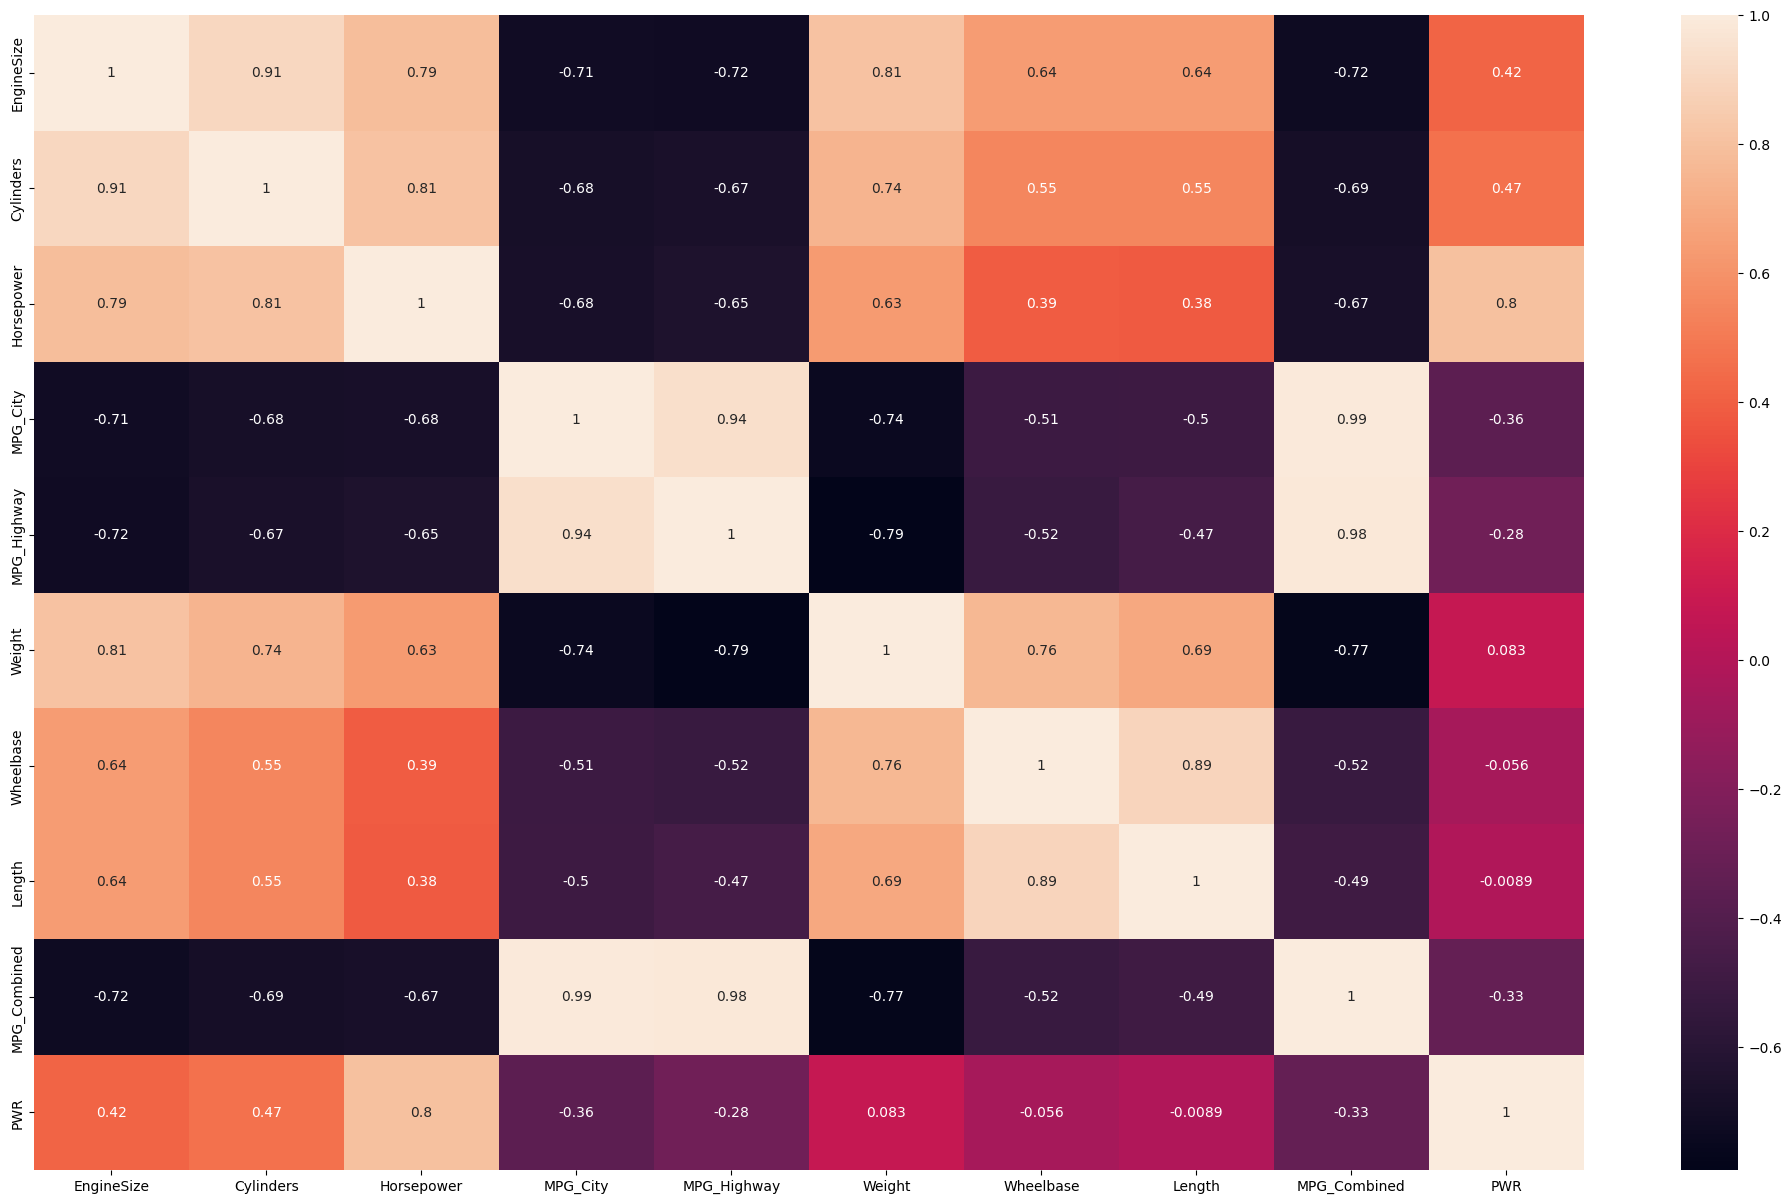

<Figure size 200x200 with 0 Axes>

In [40]:
sns.heatmap(df.corr(), annot=True)
plt.figure(figsize=(2,2))
plt.show

In [28]:
df['Origin'].value_counts()

Asia      158
USA       147
Europe    123
Name: Origin, dtype: int64

<ipython-input-43-45a9c1ccdf08>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models_per_make.index, y=models_per_make.values, palette='viridis')


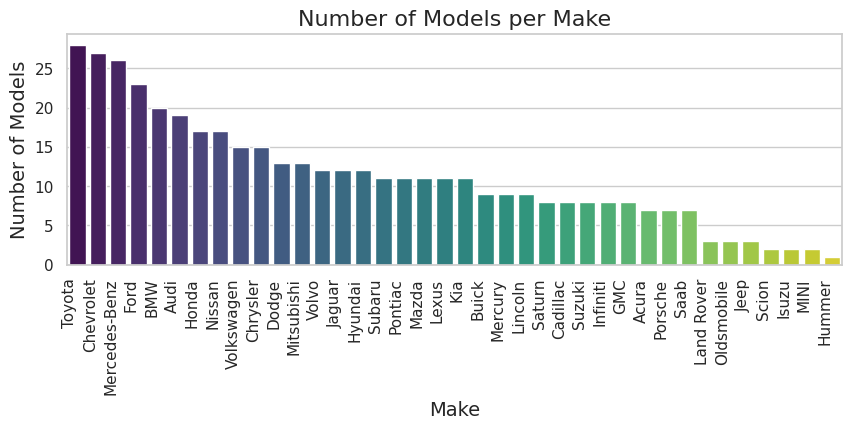

In [43]:
# Calculate the number of models per make
models_per_make = df['Make'].value_counts()

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 3))
sns.barplot(x=models_per_make.index, y=models_per_make.values, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Set plot title and labels
plt.title('Number of Models per Make', fontsize=16)
plt.xlabel('Make', fontsize=14)
plt.ylabel('Number of Models', fontsize=14)

# Show the plot
plt.show()